Import Libraries

In [1]:
import numpy as np 
import pandas as pd

Loading Data and Selecting the features

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

Explore the datasets

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,362514,19677589,21900299,32500,32500,32500.0,60 months,14.99,773.01,C,...,0,0,0,1,0,0,0,0,0,0
288564,288564,29755527,32278795,11000,11000,11000.0,60 months,20.99,297.53,E,...,0,1,0,1,0,0,0,0,0,0
213591,213591,1343334,1588314,30000,30000,30000.0,36 months,14.65,1034.83,C,...,0,0,0,1,0,0,0,0,0,0
263083,263083,33131681,35775007,14400,14400,14400.0,60 months,14.49,338.74,C,...,0,0,0,1,0,0,0,0,0,0
165001,165001,3293168,4066358,15000,15000,14900.0,36 months,8.90,476.30,A,...,0,0,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
362514,1
288564,1
213591,1
263083,1
165001,1


In [5]:
loan_data_inputs_test.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,362514,19677589,21900299,32500,32500,32500.0,60 months,14.99,773.01,C,...,0,0,0,1,0,0,0,0,0,0
288564,288564,29755527,32278795,11000,11000,11000.0,60 months,20.99,297.53,E,...,0,1,0,1,0,0,0,0,0,0
213591,213591,1343334,1588314,30000,30000,30000.0,36 months,14.65,1034.83,C,...,0,0,0,1,0,0,0,0,0,0
263083,263083,33131681,35775007,14400,14400,14400.0,60 months,14.49,338.74,C,...,0,0,0,1,0,0,0,0,0,0
165001,165001,3293168,4066358,15000,15000,14900.0,36 months,8.90,476.30,A,...,0,0,0,1,0,0,0,0,0,0


In [6]:
loan_data_targets_test.head()

,good_bad
362514,1
288564,1
213591,1
263083,1
165001,1


In [7]:
loan_data_inputs_train.shape

(93257, 324)

In [8]:
loan_data_targets_train.shape

(93257, 1)

In [9]:
loan_data_inputs_test.shape

(93257, 324)

In [10]:
loan_data_targets_test.shape

(93257, 1)

In [11]:
loan_data_inputs_train

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,362514,19677589,21900299,32500,32500,32500.0,60 months,14.99,773.01,C,...,0,0,0,1,0,0,0,0,0,0
288564,288564,29755527,32278795,11000,11000,11000.0,60 months,20.99,297.53,E,...,0,1,0,1,0,0,0,0,0,0
213591,213591,1343334,1588314,30000,30000,30000.0,36 months,14.65,1034.83,C,...,0,0,0,1,0,0,0,0,0,0
263083,263083,33131681,35775007,14400,14400,14400.0,60 months,14.49,338.74,C,...,0,0,0,1,0,0,0,0,0,0
165001,165001,3293168,4066358,15000,15000,14900.0,36 months,8.90,476.30,A,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,1055725,1287293,8000,8000,8000.0,36 months,11.71,264.61,B,...,0,0,0,1,0,0,0,0,0,0
296284,296284,29023401,31546575,24000,24000,24000.0,60 months,10.15,511.71,B,...,0,0,0,1,0,0,0,0,0,0
61777,61777,8995299,10787405,35000,35000,34900.0,36 months,8.90,1111.37,A,...,0,0,0,1,0,0,0,0,0,0
91763,91763,7062952,8724517,18000,18000,17950.0,36 months,8.90,571.56,A,...,0,0,0,1,0,0,0,0,0,0


Selecting the Features

In [12]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
                                                            'grade:B',
                                                            'grade:C','grade:D','grade:E',
                                                            'grade:F',
                                                            'grade:G',
                                                            'home_ownership:RENT_OTHER_NONE_ANY',
                                                            'home_ownership:OWN',
                                                            'home_ownership:MORTGAGE',
                                                            'addr_state:ND_NE_IA_NV_FL_HI_AL',
                                                            'addr_state:NM_VA',
                                                            'addr_state:NY',
                                                            'addr_state:OK_TN_MO_LA_MD_NC',
                                                            'addr_state:CA',
                                                            'addr_state:UT_KY_AZ_NJ',
                                                            'addr_state:AR_MI_PA_OH_MN',
                                                            'addr_state:RI_MA_DE_SD_IN',
                                                            'addr_state:GA_WA_OR',
                                                            'addr_state:WI_MT',
                                                            'addr_state:TX',
                                                            'addr_state:IL_CT',
                                                            'addr_state:KS_SC_CO_VT_AK_MS',
                                                            'addr_state:WV_NH_WY_DC_ME_ID',
                                                            'verification_status:Not Verified',
                                                            'verification_status:Source Verified',
                                                            'verification_status:Verified',
                                                            'purpose:educ__sm_b__wedd__ren_en__mov__house',
                                                            'purpose:credit_card',
                                                            'purpose:debt_consolidation',
                                                            'purpose:oth__med__vacation',
                                                            'purpose:major_purch__car__home_impr',
                                                            'initial_list_status:f',
                                                            'initial_list_status:w',
                                                            'term:36',
                                                            'term:60',
                                                            'emp_length:0',
                                                             'emp_length:1',
                                                            'emp_length:2-4',
                                                            'emp_length:5-6',
                                                            'emp_length:7-9',
                                                            'emp_length:10',
                                                            'mths_since_issue_d:<38',
                                                            'mths_since_issue_d:38-39',
                                                            'mths_since_issue_d:40-41',
                                                            'mths_since_issue_d:42-48',
                                                            'mths_since_issue_d:49-52',
                                                            'mths_since_issue_d:53-64',
                                                            'mths_since_issue_d:65-84',
                                                            'mths_since_issue_d:>84',
                                                            'int_rate:<9.548',
                                                            'int_rate:9.548-12.025',
                                                            'int_rate:12.025-15.74',
                                                            'int_rate:15.74-20.281',
                                                            'int_rate:>20.281','mths_since_earliest_cr_line:<140',
                                                            'mths_since_earliest_cr_line:141-164',
                                                            'mths_since_earliest_cr_line:165-247',
                                                            'mths_since_earliest_cr_line:248-270',
                                                            'mths_since_earliest_cr_line:271-352',
                                                            'mths_since_earliest_cr_line:>352',
                                                            'delinq_2yrs:0',
                                                            'delinq_2yrs:1-3',
                                                            'delinq_2yrs:>=4',
                                                            'inq_last_6mths:0',
                                                            'inq_last_6mths:1-2',
                                                            'inq_last_6mths:3-6',
                                                            'inq_last_6mths:>6',
                                                            'open_acc:0',
                                                            'open_acc:1-3',
                                                            'open_acc:4-12',
                                                            'open_acc:13-17',
                                                            'open_acc:18-22',
                                                            'open_acc:23-25',
                                                            'open_acc:26-30',
                                                            'open_acc:>=31',
                                                            'pub_rec:0-2',
                                                            'pub_rec:3-4',
                                                            'pub_rec:>=5',
                                                            'total_acc:<=27',
                                                            'total_acc:28-51',
                                                            'total_acc:>=52',
                                                            'acc_now_delinq:0',
                                                            'acc_now_delinq:>=1',
                                                            'total_rev_hi_lim:<=5K',
                                                            'total_rev_hi_lim:5K-10K',
                                                            'total_rev_hi_lim:10K-20K',
                                                            'total_rev_hi_lim:20K-30K',
                                                            'total_rev_hi_lim:30K-40K',
                                                            'total_rev_hi_lim:40K-55K',
                                                            'total_rev_hi_lim:55K-95K',
                                                            'total_rev_hi_lim:>95K',
                                                            'annual_inc:<20K',
                                                            'annual_inc:20K-30K',
                                                            'annual_inc:30K-40K',
                                                            'annual_inc:40K-50K',
                                                            'annual_inc:50K-60K',
                                                            'annual_inc:60K-70K',
                                                            'annual_inc:70K-80K',
                                                            'annual_inc:80K-90K',
                                                            'annual_inc:90K-100K',
                                                            'annual_inc:100K-120K',
                                                            'annual_inc:120K-140K',
                                                            'annual_inc:>140K',
                                                            'dti:<=1.4',
                                                            'dti:1.4-3.5',
                                                            'dti:3.5-7.7',
                                                            'dti:7.7-10.5',
                                                            'dti:10.5-16.1',
                                                            'dti:16.1-20.3',
                                                            'dti:20.3-21.7',
                                                            'dti:21.7-22.4',
                                                            'dti:22.4-35',
                                                            'dti:>35',
                                                            'mths_since_last_delinq:Missing',
                                                            'mths_since_last_delinq:0-3',
                                                            'mths_since_last_delinq:4-30',
                                                            'mths_since_last_delinq:31-56',
                                                            'mths_since_last_delinq:>=57',
                                                            'mths_since_last_record:Missing',
                                                            'mths_since_last_record:0-2',
                                                            'mths_since_last_record:3-20',
                                                            'mths_since_last_record:21-31',
                                                            'mths_since_last_record:32-80',
                                                            'mths_since_last_record:81-86','mths_since_last_record:>86']]

In [13]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [14]:
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


PD Model Estimation

Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [16]:
# we create objects
reg = LogisticRegression()

In [17]:
# Set pandas dataframe to display all columns / rows
pd.options.display.max_rows = None

In [18]:
inputs_train.shape

(93257, 104)

In [19]:
loan_data_targets_test.shape

(93257, 1)

In [20]:
# Estimates the coefficients of the objects from 'logisticRegression'
# with inputs(independent variables) contained in the dataframe
# and targets(dependent variables) contained in the dataframe
reg.fit(inputs_train, loan_data_targets_train)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
# Display the intercept contain in the estimated ('fitted') objects from the 'LogisticRegression' class.
reg.intercept_

array([-0.98103245])

In [22]:
# Stores the names of the columns of a dataframe in a variable
feature_name = inputs_train.columns.values

In [23]:
# Creates a dataframe with a column titled 'Feature name' and rows value contained in the 'feature_name' variable.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table['coefficients'] = np.transpose(reg.coef_)
# Increases the index of every row of the dataframe with 1.
summary_table.index = summary_table.index + 1
# Assigns values of the row with index 0 of the dataframe.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Sorts the dataframe by index.
summary_table = summary_table.sort_index()
summary_table

,Feature name,coefficients
0,Intercept,-0.981032
1,grade:A,0.725638
2,grade:B,0.949619
3,grade:C,0.733914
4,grade:D,0.609506
5,grade:E,0.479640
6,grade:F,0.420115
7,home_ownership:OWN,0.056236
8,home_ownership:MORTGAGE,0.116956
9,addr_state:NM_VA,0.166683


Build a Logistic Regression Model with P-Values

In [28]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [25]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [42]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        # Ensure X is numeric
        X = X.apply(pd.to_numeric, errors='coerce')
        X.fillna(X.mean(), inplace=True)  # Handle NaN values

        # Fit the logistic regression model
        self.model.fit(X, y)

        # Calculate the Fisher Information Matrix
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        
        # Calculate Fisher Information Matrix
        F_ij = np.dot((X / denom).T, X)

        # Check the type and dtype of F_ij
        print("F_ij type:", type(F_ij))
        print("F_ij dtype:", F_ij.dtype)

        # Convert F_ij to a float64 array if necessary
        if F_ij.dtype == 'O':
            F_ij = np.array(F_ij, dtype=np.float64)

        # Check the determinant of F_ij
        det_F_ij = np.linalg.det(F_ij)
        print("Determinant of F_ij:", det_F_ij)

        # Inverse Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [46]:
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.
reg2 = LogisticRegression_with_p_values()

In [47]:
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.
reg2.fit(inputs_train, loan_data_targets_train)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F_ij type: <class 'numpy.ndarray'>
F_ij dtype: object
Determinant of F_ij: 3.600893606744088e+270


In [48]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.981032
1,grade:A,0.725638
2,grade:B,0.949619
3,grade:C,0.733914
4,grade:D,0.609506
5,grade:E,0.479640
6,grade:F,0.420115
7,home_ownership:OWN,0.056236
8,home_ownership:MORTGAGE,0.116956
9,addr_state:NM_VA,0.166683


In [50]:
# Assuming you have already defined your custom class as shown previously

# Create an instance of your custom logistic regression class
reg = LogisticRegression_with_p_values()

# Fit the model with your training data
reg.fit(inputs_train, loan_data_targets_train.values.ravel())  # Ensure y is 1D

# Now you can access the p_values attribute
p_values = reg.p_values
print(p_values)

F_ij type: <class 'numpy.ndarray'>
F_ij dtype: object
Determinant of F_ij: 3.600893606744088e+270
[0.0003169907593506731, 3.0997937900602977e-15, 4.343558008125583e-11, 8.246363977142765e-09, 3.2048224995285714e-07, 1.953033761577828e-05, 0.1576168299158094, 4.504161344749622e-06, 0.011305375746124932, 0.17926219551114642, 0.01476055834094481, 0.0025097939168917172, 0.03584819995835682, 4.5831768166163723e-05, 0.07539699974328372, 6.306161589532846e-06, 0.002148391771971444, 6.1225869677039145e-09, 7.833095369977834e-09, 1.3949814723406496e-09, 7.832715977989753e-05, 0.0007677526976357503, 0.8199709300846159, 5.312917352445288e-10, 0.00021281348169508807, 0.0006933373638159115, 1.0317486398639566e-06, 0.17309852171870532, 0.18592943188132116, 0.0004448225101972586, 0.0010398734315333765, 0.06000513708050129, 0.005385571372676272, 2.2542578927326094e-05, 4.762307048293182e-47, 6.577927778328842e-38, 3.803548991646412e-32, 3.442086701434769e-20, 5.088069466805593e-11, 0.00103578493268248

In [51]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [52]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [53]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.981032,NaN
1,grade:A,0.725638,3.169908e-04
2,grade:B,0.949619,3.099794e-15
3,grade:C,0.733914,4.343558e-11
4,grade:D,0.609506,8.246364e-09
5,grade:E,0.479640,3.204822e-07
6,grade:F,0.420115,1.953034e-05
7,home_ownership:OWN,0.056236,1.576168e-01
8,home_ownership:MORTGAGE,0.116956,4.504161e-06
9,addr_state:NM_VA,0.166683,1.130538e-02


In [55]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [56]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


In [57]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F_ij type: <class 'numpy.ndarray'>
F_ij dtype: object
Determinant of F_ij: 5.2857806663583604e+224


In [58]:
feature_name = inputs_train.columns.values

In [59]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.911184
1,grade:A,0.705689
2,grade:B,0.859413
3,grade:C,0.654683
4,grade:D,0.537625
5,grade:E,0.420682
6,grade:F,0.377750
7,home_ownership:OWN,0.048684
8,home_ownership:MORTGAGE,0.111300
9,addr_state:NM_VA,0.175903


In [60]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
# Here we get the results for our final PD model.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.911184,NaN
1,grade:A,0.705689,3.730572e-04
2,grade:B,0.859413,1.019963e-12
3,grade:C,0.654683,4.257568e-09
4,grade:D,0.537625,3.673587e-07
5,grade:E,0.420682,6.279854e-06
6,grade:F,0.377750,1.035328e-04
7,home_ownership:OWN,0.048684,2.195669e-01
8,home_ownership:MORTGAGE,0.111300,1.153173e-05
9,addr_state:NM_VA,0.175903,7.341645e-03


In [61]:
import pickle

In [62]:
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.
pickle.dump(reg2, open('pd_model.sav', 'wb'))

PD Model Validation (Test)
Out-of-sample validation (test)

In [64]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [66]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [67]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


In [68]:
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test = reg2.model.predict(inputs_test)

In [69]:
# This is an array of predicted discrete classess (in this case, 0s and 1s).
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [71]:
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [72]:
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.
y_hat_test_proba

array([[0.06863343, 0.93136657],
       [0.15513391, 0.84486609],
       [0.11780737, 0.88219263],
       ...,
       [0.02688083, 0.97311917],
       [0.04064878, 0.95935122],
       [0.04042048, 0.95957952]])

In [73]:
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.
y_hat_test_proba[:][:,1]


array([0.93136657, 0.84486609, 0.88219263, ..., 0.97311917, 0.95935122,
       0.95957952])

In [74]:
# We store these probabilities in a variable.
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [75]:
# This variable contains an array of probabilities of being 1.
y_hat_test_proba

array([0.93136657, 0.84486609, 0.88219263, ..., 0.97311917, 0.95935122,
       0.95957952])

In [77]:
loan_data_targets_test_temp = loan_data_targets_test

In [78]:
# We reset the index of a dataframe.
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)


In [79]:
# Concatenates two dataframes.
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)


In [80]:
df_actual_predicted_probs.shape

(93257, 2)

In [81]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [82]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [83]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.931367
288564,1,0.844866
213591,1,0.882193
263083,1,0.947724
165001,1,0.970732


Accuracy and Area under the Curve

In [84]:
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [85]:
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7350,2840
1,35622,47445


In [86]:
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078814,0.030453
1,0.381977,0.508755


In [87]:
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.587569833899868

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score

In [89]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 0.99990186,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 6.74154598e-04, ...,
        9.99987962e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99339424, 0.9909597 , ..., 0.46007309, 0.45213194,
        0.44063637]))

In [90]:
# Here we store each of the three arrays in a separate variable. 
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

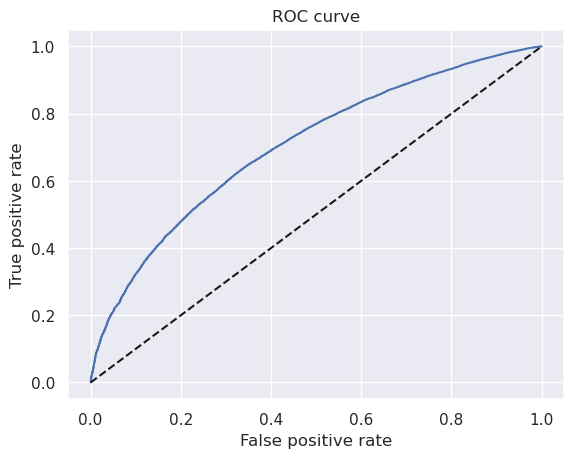

In [93]:
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, tpr)
# We plot a seconary diagonal line, with dashed line style and black color.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We name the x-axis "False positive rate".
plt.xlabel('False positive rate')
# We name the x-axis "True positive rate".
plt.ylabel('True positive rate')
# We name the graph "ROC curve".
plt.title('ROC curve')


In [94]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.7040423456369501

Gini and Kolmogorov-Smirnov
Gini Index, aka Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when randomly selected.

Gini index varies between values 0 and 1. Gini index of 0 = the purity of classification. Each element belongs to a specified class or only one class exists there. Gini index of 1 = the random distribution of elements across various classes.

The value of 0.5 of the Gini Index shows an equal distribution of elements over some classe

In [95]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [96]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
2808,0,0.440636,0
41663,1,0.452132,0
39810,0,0.460073,0
12074,0,0.467965,0
41676,0,0.479717,0


In [97]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
237141,1,0.992927,1
244354,1,0.993048,1
258783,1,0.993126,1
251945,1,0.993324,1
242624,1,0.993394,1


In [98]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [99]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,2808,0,0.440636,0
1,41663,1,0.452132,0
2,39810,0,0.460073,0
3,12074,0,0.467965,0
4,41676,0,0.479717,0


In [100]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [101]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,2808,0,0.440636,0,1,0,1
1,41663,1,0.452132,0,2,1,1
2,39810,0,0.460073,0,3,1,2
3,12074,0,0.467965,0,4,1,3
4,41676,0,0.479717,0,5,1,4


In [102]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [103]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,2808,0,0.440636,0,1,0,1,0.000011,0.000000,0.000098
1,41663,1,0.452132,0,2,1,1,0.000021,0.000012,0.000098
2,39810,0,0.460073,0,3,1,2,0.000032,0.000012,0.000196
3,12074,0,0.467965,0,4,1,3,0.000043,0.000012,0.000294
4,41676,0,0.479717,0,5,1,4,0.000054,0.000012,0.000393


In [104]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,237141,1,0.992927,1,93253,83063,10190,0.999957,0.999952,1.0
93253,244354,1,0.993048,1,93254,83064,10190,0.999968,0.999964,1.0
93254,258783,1,0.993126,1,93255,83065,10190,0.999979,0.999976,1.0
93255,251945,1,0.993324,1,93256,83066,10190,0.999989,0.999988,1.0
93256,242624,1,0.993394,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

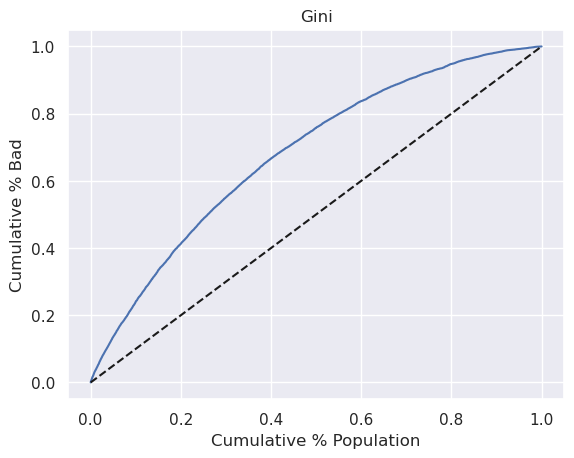

In [105]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [106]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.40808469127390024

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

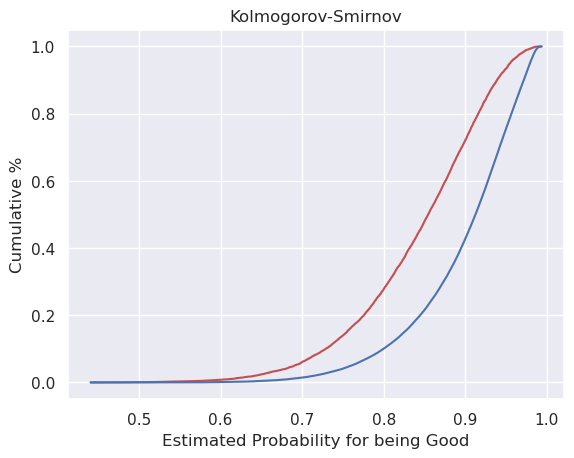

In [107]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [108]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.2994568131406464

Applying PD model for decision making

a Creating scorecard
calculating credit worthiness - credit scores based on our PD model

In [109]:
df_ref_categories = pd.DataFrame(ref_categories,columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

df_scorecard = pd.concat ([summary_table, df_ref_categories ])
df_scorecard = df_scorecard.reset_index()

df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.911184,NaN,Intercept
1,1,grade:A,0.705689,3.730572e-04,grade
2,2,grade:B,0.859413,1.019963e-12,grade
3,3,grade:C,0.654683,4.257568e-09,grade
4,4,grade:D,0.537625,3.673587e-07,grade


In [110]:
#let's say we fix minimum score of 300 and max score of 850
min_score = 300
max_score = 850

In [111]:
#determining the ratio to multiply with the coefficients so that 
# min_score is equal to 300 and max_score is equal to 850
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
ratio_ = (max_score-min_score) / (max_sum_coef - min_sum_coef)
#calculating scores from coefs
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * ratio_
#replacing intercept coef
df_scorecard['Score - Calculation'][0] = (df_scorecard['Coefficients'][0] -\
                                           min_sum_coef)*ratio_+ min_score
#rounding the scores to integer like
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard.head()

/tmp/ipykernel_7946/4094337746.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = (df_scorecard['Coefficients'][0] -\


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.911184,NaN,Intercept,338.666185,339.0
1,1,grade:A,0.705689,3.730572e-04,grade,54.870930,55.0
2,2,grade:B,0.859413,1.019963e-12,grade,66.823780,67.0
3,3,grade:C,0.654683,4.257568e-09,grade,50.904908,51.0
4,4,grade:D,0.537625,3.673587e-07,grade,41.803075,42.0


In [112]:
#let's check if we have min score of 300 and max score of 800
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
#let's check if we have min score of 300 and max score of 800
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print(min_sum_score_prel, max_sum_score_prel)

301.0 852.0


In [113]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
#let's check which index value to increase
df_scorecard['Difference'] =  df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
#let's print out the max scores of each feature
df_scorecard.loc[df_scorecard.groupby(['Original feature name'])['Score - Final'].idxmax()]

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Score - Final,Difference
0,0,Intercept,-0.911184,NaN,Intercept,338.666185,339.0,339.0,0.333815
97,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.0,0.000000
21,21,addr_state:WV_NH_WY_DC_ME_ID,0.396982,7.844345e-05,addr_state,30.867373,31.0,31.0,0.132627
64,64,annual_inc:120K-140K,0.523558,3.889573e-07,annual_inc,40.709294,41.0,41.0,0.290706
67,67,dti:1.4-3.5,0.223933,1.334803e-01,dti,17.411920,17.0,17.0,-0.411920
30,30,emp_length:1,0.200427,1.297746e-04,emp_length,15.584245,16.0,16.0,0.415755
2,2,grade:B,0.859413,1.019963e-12,grade,66.823780,67.0,67.0,0.176220
8,8,home_ownership:MORTGAGE,0.111300,1.153173e-05,home_ownership,8.654178,9.0,9.0,0.345822
28,28,initial_list_status:w,0.041567,1.115145e-01,initial_list_status,3.232055,3.0,3.0,-0.232055
51,51,inq_last_6mths:0,0.311309,1.056778e-01,inq_last_6mths,24.205901,24.0,24.0,-0.205901


In [114]:
#increasing the rounded score of some features 1+ to have max score of 850 at the end
df_scorecard['Score - Final'][21]  = 39 #coef will be adjusted one pt higher

/tmp/ipykernel_7946/1213069965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][21]  = 39 #coef will be adjusted one pt higher


In [116]:
#let's check if we have min score of 300 and max score of 800
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

301.0

In [117]:
#let's check if we have min score of 300 and max score of 800
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

860.0

Score card is ready!!! Let's Export It

In [131]:
inputs_test_with_ref_cat.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0


In [132]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Score - Final,Difference
0,0,Intercept,-0.911184,NaN,Intercept,338.666185,339.0,339.0,0.333815
1,1,grade:A,0.705689,3.730572e-04,grade,54.870930,55.0,55.0,0.129070
2,2,grade:B,0.859413,1.019963e-12,grade,66.823780,67.0,67.0,0.176220
3,3,grade:C,0.654683,4.257568e-09,grade,50.904908,51.0,51.0,0.095092
4,4,grade:D,0.537625,3.673587e-07,grade,41.803075,42.0,42.0,0.196925
5,5,grade:E,0.420682,6.279854e-06,grade,32.710149,33.0,33.0,0.289851
6,6,grade:F,0.377750,1.035328e-04,grade,29.372030,29.0,29.0,-0.372030
7,7,home_ownership:OWN,0.048684,2.195669e-01,home_ownership,3.785429,4.0,4.0,0.214571
8,8,home_ownership:MORTGAGE,0.111300,1.153173e-05,home_ownership,8.654178,9.0,9.0,0.345822
9,9,addr_state:NM_VA,0.175903,7.341645e-03,addr_state,13.677375,14.0,14.0,0.322625


In [133]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [135]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0


In [136]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [137]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,False,False,True,False,False,False,False,True,0,...,1,0,0,0,0,1,0,0,0,0
288564,1,False,False,False,False,True,False,False,True,0,...,0,0,1,0,0,1,0,0,1,0
213591,1,False,False,True,False,False,False,False,True,0,...,0,0,0,0,0,1,0,0,0,0
263083,1,False,False,True,False,False,False,False,True,0,...,0,0,0,1,0,1,0,0,0,0
165001,1,True,False,False,False,False,False,False,True,0,...,0,0,0,0,0,1,0,0,0,0


In [138]:
scorecard_scores = df_scorecard['Score - Final']

In [139]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [140]:
scorecard_scores.shape

(102,)

In [141]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [142]:
scorecard_scores.shape

(102, 1)

In [143]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [144]:
y_scores.head()

,0
362514,613.0
288564,542.0
213591,567.0
263083,635.0
165001,683.0


In [145]:
y_scores.tail()

,0
115,573.0
296284,685.0
61777,690.0
91763,657.0
167512,656.0


From Credit Score to PD

In [146]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.